<a href="https://colab.research.google.com/github/sandrodevdariani/ML/blob/main/basic_goldprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [8]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
correlation = gold_data.corr()

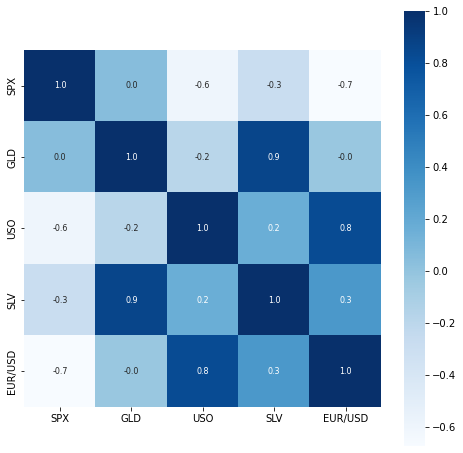

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


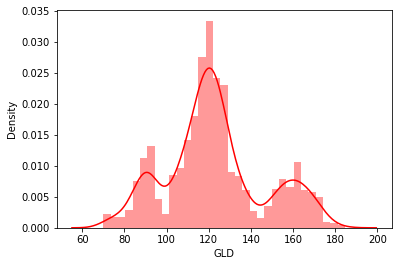

In [14]:
#distrubution of GLD
sns.distplot(gold_data["GLD"], color = 'red')

In [22]:
X = gold_data.drop(["Date", "GLD"],axis=1)
Y = gold_data['GLD']


In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [19]:
#random forest reggresion
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.72189956  82.1730997  116.07730026 127.74700063 120.70200101
 154.77249818 150.08249815 126.17910064 117.41529886 125.97010103
 116.79500095 171.19360108 141.72189928 167.92139887 115.07740013
 117.27240073 138.06860354 170.32530139 159.8962029  159.90589957
 155.2194004  125.16340009 175.6543008  157.85430241 125.25610069
  93.71429984  77.24379995 120.55219979 119.18800006 167.48370035
  88.03880033 124.90669989  91.2381009  117.78050041 121.07409928
 136.16780048 115.67830109 115.35130084 148.51799945 107.34780105
 104.15080235  87.03149798 126.52440035 118.14399986 153.41989949
 119.72420027 108.35499982 107.91169842  93.07330041 127.16759756
  75.0912002  113.59499911 121.1385001  111.31019898 118.88449899
 120.91119939 158.62210102 166.93070127 146.95479704  86.00449845
  94.36340038  86.85029876  90.60490044 118.83090069 126.47860062
 127.50239977 170.00509977 122.32459922 117.35899938  98.3084998
 168.09930014 142.88609794 132.44610234 121.22320193 121.89329939
 119.805100

In [30]:
# R squared error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9895688157114138


In [31]:
Y_test = list(Y_test)

<function matplotlib.pyplot.show>

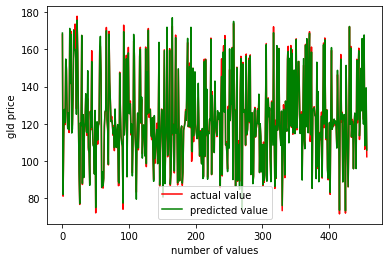

In [32]:
plt.plot(Y_test, color="red", label = "actual value")
plt.plot(test_data_prediction, color = 'green', label = 'predicted value')
plt.xlabel('number of values')
plt.ylabel('gld price')
plt.legend()
plt.show